In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
from skimage.io import imread
import pylab

In [3]:
from skimage import img_as_float

In [4]:
from sklearn.cluster import KMeans

In [5]:
from sklearn.metrics import mean_squared_error


def calc_mse(image1, image2, shape) -> float:   
    _x, _y, _ignore = shape
    
    # 3 is number of colour components
    # https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio#Application_in_color_images
    return np.sum( (image1 - image2) ** 2 ) / (_x * _y * 3)


def calc_psnr(image1, image2, shape) -> float:
    MSE = calc_mse(image1, image2, shape)
    return 10.0 * np.log10( 1.0 / MSE)
    
    
def get_psnr(image_path: str='../data/parrots.jpg',
             nc: int=10,
             verbose: bool=False,
             show_image: bool=True,
             mode: str='mean'):
    if mode not in ('median', 'mean', ):
        raise ValueError(f'Incorrect mode {mode}. The acceptable values are [\'median\', \'mean\']')
    
    image = img_as_float( imread(image_path) )
    x, y, z = image.shape

    df = pd.DataFrame(np.reshape(image.copy(), (x*y, z)), columns=['R', 'G', 'B'])

    clstr = KMeans(init='k-means++', random_state=241, n_jobs=-1, n_clusters=nc)

    df['cluster'] = clstr.fit_predict(df)
    if mode == 'mean':
        if verbose:
            print('Clusters mean colors:')
            print( df.groupby('cluster').mean() )

        cluster_colors = df.groupby('cluster').mean().values
    else:
        if verbose:
            print('Clusters median colors:')
            print( df.groupby('cluster').median() )

        cluster_colors = df.groupby('cluster').median().values
    
    result_image = [cluster_colors[i] for i in df['cluster']]

    result_image = np.reshape(result_image, (x, y, z))

    if show_image:
        pylab.imshow(result_image)

    return calc_psnr(image, result_image, image.shape)

Clusters mean colors:
                R         G         B
cluster                              
0        0.047812  0.108191  0.044927
1        0.434242  0.372049  0.169713
2        0.090877  0.640409  0.065884
3        0.953347  0.825036  0.041611
4        0.801218  0.824986  0.805508
5        0.455243  0.725184  0.486198
6        0.043397  0.549936  0.598204
7        0.777618  0.092609  0.691732
8        0.794984  0.074491  0.029508


19.112672735788138

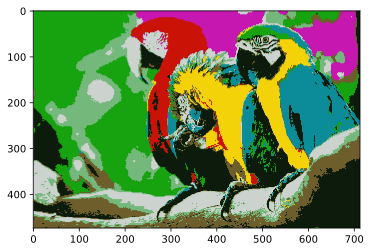

In [6]:
get_psnr('../data/parrots.jpg', nc=9, verbose=True, mode='mean', show_image=True)

In [7]:
import time
x_plot = []
y_plot = []

for num_of_clusters in range(1, 21):
    start = time.time()
    psnr = get_psnr('../data/parrots.jpg', nc=num_of_clusters, verbose=False, mode='mean', show_image=False)
    finish = time.time()
    
    delta = finish - start
    
    x_plot.append(num_of_clusters)
    y_plot.append(psnr)
    
    print(f'Calculated {num_of_clusters}/20 by {int(delta)} seconds')

trace = go.Scatter(x=x_plot, y=y_plot, name='PSNR value')
threshold = go.Scatter(x=x_plot, y=[20, ] * len(x_plot), name='Threshold')
 
data = [trace, threshold]

layout = {'title': f'How PSNR value depends on number of clusters'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Calculated 1/20 by 0 seconds
Calculated 2/20 by 2 seconds
Calculated 3/20 by 2 seconds
Calculated 4/20 by 3 seconds
Calculated 5/20 by 4 seconds
Calculated 6/20 by 5 seconds
Calculated 7/20 by 4 seconds
Calculated 8/20 by 6 seconds
Calculated 9/20 by 9 seconds
Calculated 10/20 by 10 seconds
Calculated 11/20 by 12 seconds
Calculated 12/20 by 16 seconds
Calculated 13/20 by 17 seconds
Calculated 14/20 by 20 seconds
Calculated 15/20 by 19 seconds
Calculated 16/20 by 24 seconds
Calculated 17/20 by 24 seconds
Calculated 18/20 by 28 seconds
Calculated 19/20 by 30 seconds
Calculated 20/20 by 33 seconds


20.127588746514583

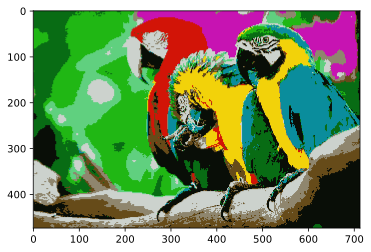

In [8]:
get_psnr('../data/parrots.jpg', nc=11, verbose=False, mode='mean', show_image=True)

19.84128407389954

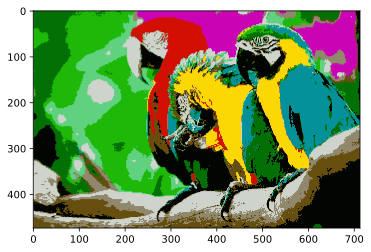

In [9]:
get_psnr('../data/parrots.jpg', nc=11, verbose=False, mode='median', show_image=True)